# Mixture Models & Gaussian Process

## Objectives
* Definitions of Mixture Models and Gaussian Process
* Mixture models python examples
* Gaussian Process' python example
* Use of Gaussian process to model errors and process scientific data

# Mixture Models

* A common approach to model building is to combine or mix simpler models to obtain more complex ones. In statistics, these models are known as **Mixture models**.<br> 
* Mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. <br>
* Sometimes a process or phenomenon under study cannot be properly described using a single distribution like a Gaussian or a binomial, or any other pure distribution, but can be described as a mixture of such distributions. Models that assume the data comes from a mixture of distributions known as Mixture models. [1]  

Bayesian Gaussian Mixture model using plate notation
<img src=”mixturemodels.png”> [copied from 1]

## Structure of a Mixture Model

### General Mixture Model

A typical finite-dimensional mixture model is a hierarchical model consisting of the following components:

1. N random variables that are observed, each distributed according to a mixture of **K** components, with the components belonging to the same parametric family of distributions but with different parameters. <br> 
2. N random latent variables specifying the identity of the mixture component of each observation, each distributed according to a K-dimensional categorical distribution.<br> 
3. A set of **K** mixture weights, which are probabilities that sum to 1.<br>
4. A set of **K** parameters, each specifying the parameter of the corresponding mixture component. If the mixture components are Gaussian distributions, there will be a mean and variance for each component. If the mixture components are categorical distributions there will be a vector of V probabilities summing to 1.  [1]

A parametric mixture model is described mathematically as follows: [1]<br>

$$K  = number \, of \, mixture\, components$$ <br>
$$N = number\,of\,observation$$ <br>
$${\theta}_{i=1...K} \quad = \, parameter\, of\, distribution\, of\, observation\, associated\, with\, component\, i$$ <br>
$${\Phi}_{i=1...K} \quad = \, mixture\, weight, \, i.e. \, prior\, probability\, of\, a\, particular\, component\, i$$ <br>
$${\Phi} \quad = \, K-dimensional\, vector\, composed \, of\, all\, the\, individual\, {\Phi}_{i=1...K}; \, must\, sum\, to\, 1$$ <br>
$$z_{i=1...N} \quad = \, component\, of\, observation\, i$$ <br>
$$x_{i=1...N} \quad = \, observation\, i$$ <br>


### Multi-variate Gaussian mixture model

A Bayesian Gaussian mixture model is extended to fit a vector of unknown parameters, or multivariate normal distributions. In a multivariate distribution (i.e. one modelling a vector with N random variables) one may model a vector of parameters using a Gaussian mixture model prior distribution on the vector of estimates given by,
$$ p(\theta) = \sum_{i=1}^{K}\Phi_i N(\mu_i, \sum_i ) $$

where the $i_{th}$ vector is characterized by normal distributions with weights $\Phi_i$, means $\mu_i$ and covariance matrices $\sum_i$. <br>
The multi-variate gaussian distribution is useful for patch wise shapes of images and clusters. [1]

### Parameter estimation and system identification

Parametric mixture models are used when the output i.e. distribution Y is known and can be sampled from X i.e. input values, but the values $a_i$ and $\theta_i$ are to evaluated. <br>
A variety of approaches for such problems are available, but the maximum likelihood methods such as expectation maximization(EM) or maximum a posteriori(MAP) are mainly used. [1]

### Expectation-Maximization (EM)

EM is the most widely used method to determine the parameters of a parametric mixture model distribution($a_i \, and \, \theta_i$). It is an iterative algorithm with two steps: 1)Expectation step and 2) Maximization step.   [1]

### Expectation Step
With initial guesses for the parameters of the mixture model, 'partial membership' of each data point in each constituent distribution is computed by calculating expectation values for the membership variables of each data point. [1]

### Maximization Step
With expectation values in hand for group membership, plug-iin estimates are recomputed for the distribution parameters. <br>
The mixing coefficients $a_i$ are the means of the values over the N data points. <br>
The component model parameters $\theta_i$ are calculated by expectation-maximization using data points $x_j$ that have been weighted using the values. <br>
With the new estimates being computed, the expectation step is repeated to recompute new values. The entire procedure is until the model parameters converge. [1]


## Gaussian Mixture Model:
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. [14]<br> 
The code is copied from [7] with minor changes.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GMM
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Generate data 
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)
X = X[:, ::-1] # flip the axes for plotting

Gaussian Mixture Models can be used for finding clusters in the similar fashion as k-means.

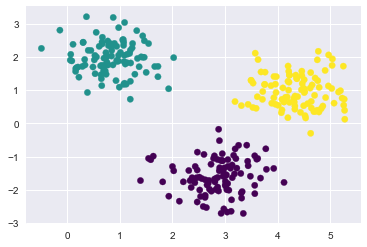

In [32]:
from sklearn.mixture import GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

The Scikit-Learn library contains **predict_proba** method which can be used to find probabilistic cluster assignments. This method returns a matrix : [n_samples, n_clusters]; which measures  the probability of a data point belonging to a given cluster. 

In [33]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


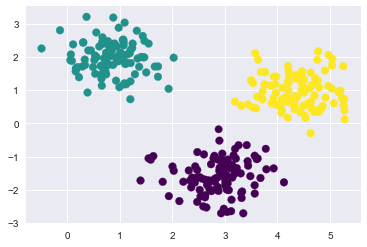

In [34]:
size = 60 * probs.max(1) ** 2  # square emphasizes the difference between points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

The uncertainty in the data points can be visualized by increasing the size of each point proportional to the certainty of its prediction. From the plot we can see that, the points on the boundary of clusters indicate the uncertainty of data points in the cluster.

GMM is similar to k-means i.e. it uses the Expectation-Minimization approach to determine the parameters of the parametric mixture model. The E-M approach has the following steps:
1. E-Step: Find weights which includes the probability of each data point in the cluster.
2. M-Step: Using weights from E-step; update location, normalization and shape for all data points in a cluster.  [7]

#### E-M is not the ideal approach and thus multiple random initializations are used in real-life examples. 

The function below creates ellipses based on GMM output.

In [35]:
from matplotlib.patches import Ellipse

#draw an ellipse for a position and covariance
def ell(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca() 
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        ell(pos, covar, alpha=w * w_factor)

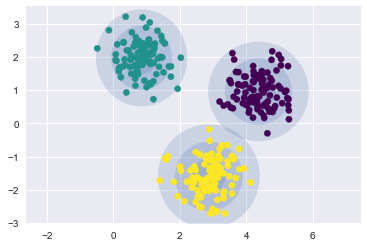

In [36]:
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, X)

GMM can also be used to fit a strectched dataset.

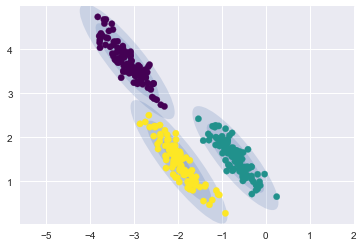

In [38]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### Mixture model example with data.npy
The code is copied from [6] with minor changes

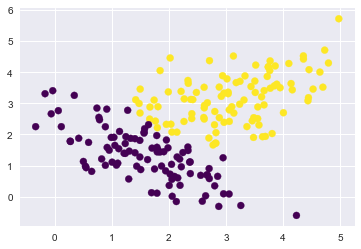

In [39]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture

X = np.load('data.npy') #load data 
#print(X)
#fit GMM
gmm = GaussianMixture(n_components = 2, covariance_type = 'full', tol = 0.001)
gmm.fit(X)

#predict the values
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=None, cmap='viridis')
#plt.legend()
plt.show()

In [40]:
#evaluate mean and covariance
print('The mean is:',gmm.means_)  
print('The covariance is:',gmm.covariances_)

The mean is: [[ 1.60629419  1.3470999 ]
 [ 3.0363831   3.09828041]]
The covariance is: [[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


In [41]:
probs = gmm.predict_proba(X)
print('The probability is:',probs[:5].round(2))

The probability is: [[ 0.01  0.99]
 [ 0.06  0.94]
 [ 0.    1.  ]
 [ 0.87  0.13]
 [ 0.    1.  ]]


Here a grid of all X and Y coordinates is created and GMM is evaluated. Then GMM can be plotted as contours over the original data.

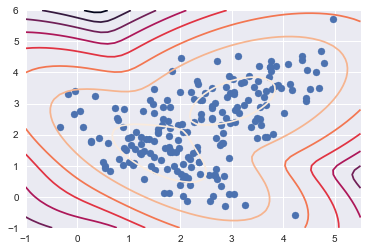

In [42]:
A, B = np.meshgrid(np.linspace(-1, 5.5), np.linspace(-1,6))
X_new = np.array([A.ravel(), B.ravel()]).T

C = gmm.score_samples(X_new)
C = C.reshape((50,50))

plt.contour(A, B, C)
plt.scatter(X[:, 0], X[:, 1])

plt.show()

Gaussian Mixture Models is a clustering technique that fits multivariate Gaussian distributions to the given data. [6]

## Gaussian Process (GP)

### Definition: 
For the function vector, $ f = (f(x_1),...f(x_n))$. 
If, for any choice of input points, $(x_1,...,x_n)$, the marginal distribution over f: <br> $$P(F) = \int_{f \not\in F} P(f) df $$ <br> is a multi-variate Gaussian then the distribution *P(f)* over the function *f* is said to be a **Gaussian Process**. [2]

A GP is parameterized with a mean function and a covariance function. <br>
A Gaussian Process Regression is an application of a multivariate Gaussian Distribution as a powerful predictive tool for data that is highly non-linear or not easily modeled using linear or multivariate regression. [14] <br>
GP's can be expressed entirely by:
1. vector of mean values defined by data at i/p variables $x_1,x_2,...,x_n$
2. covariance matrix across $(x_1,x_1), (x_2,x_2),...,(x_i,x_j)$ <br>

### Covariance functions
Gaussian processes can be completely defined by their second-order statistics. The covariance function completely defines the process behaviour when Gaussian function has mean = 0. <br>
Stationarity, Isotropy, Smoothness and Periodicity are the key aspects defined by covariance functions. <br>
**Stationarity** refers to the process's behaviour regarding the separation of any two points $x$ and $x'$. If the process is stationary,it depends on their separation, $x-x'$, while if non-stationary it depends on the actual position of the points $x$ and $x'$. <br>
If the process depends only on $|x-x'|$, the Euclidean distance between $x$ and $x'$, then the process is considered **Isotropic**. <br>
A process that is currently stationary and isotropic is considered to be **Homogeneous**. <br>
**Periodicity** refers to inducing periodic patterns within the behaviour of the process. [2]

### Gaussian process prediction or Kriging
For Kriging, it is assumed that for a Gaussian process $f$ observed at coordinates $x$, the vector of values $f(x)$ is just one sample from a multivariate Gaussian distribution of dimension equal to number of observed coordinates $|x|$. [2]

## Gaussian Process Regression Example

This example is solved in two different ways:
1. noise-free case
2. noise case with known noise level for each value <br>

Here the kernel's parameters are estimated using MLE.

The code is copied from [4] with minor changes

In [44]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    return np.sin(x)

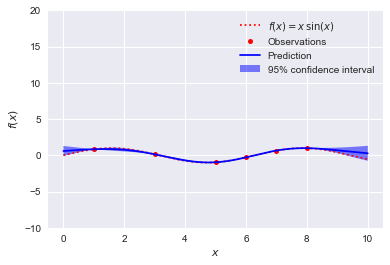

In [45]:
# noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend()


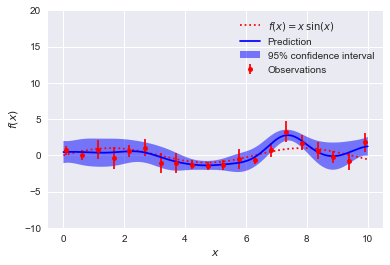

In [46]:
# noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation
gp.fit(X, y)

# prediction on the meshed x-axis
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on  MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend()

plt.show()

## Use of Gaussian Process to model errors and process scientific data

The method of Gaussian Process Regression(GPR) assumes that the data can be well modeled as a sample of a Gaussian Process.
We are given a set of inputs 'x' and its corresponding outputs 'y', called as training data. [9]<br>
Consider the following model of a sample Gaussian process, [9] $$ y(x) = \mu (x) + z(x) + z_0 $$ <br>
$$\mu (x) \rightarrow models\, unconditional\, expectation\, of\, process $$
$$z(x) \rightarrow Gaussian \, random\,field\,with\,zero\,mean\,and\,covariance $$
$$z_0 \rightarrow random \,variable\,called\,noise $$  

GPR models can predict the standard deviation of prediction and acts as a measure of uncertainty to the model's prediction. <br>
GPR can aslo perform the automatic tuning of adjustable parameters by maximum likelihood estmation(MLE). <br>
The hyperparameters $\theta,\, \sigma,\, \sigma_0,\, \mu \, and \, \mu_0 $ can help to evaluate the marginal likelihood of given data. <br>
The maximum likelihood predicts how likely the data is to occur given a particular model and serves as a rating of how well the model explains the data. [9]

### Applications:

###  $\rightarrow$ Design Optimization: [9]
The use of regression techniques to optimize designs has increased significantly. It combines the robustness of stochastic global search methods with the efficiency of traditional gradient based algorithms. <br>
The basic steps to build a model-based optimization algorithm are:
* Develop a local model for an unknown function; within the trust limits of the model
* Optimize the model
* Validate results and update the models based on required changes. Repeat until the model reaches its limits
 

###  $\rightarrow$ Measurement Error Estimation: [9]

Another application is to estimate measurement errors.<br>
It is done by fitting a parametric model to the measured data and the residual errors are used to build an estimate of the measurement error. <br>
In case of parametric approach, a systematic error is inroduced if the equation that describes the model us not specified correctly. In such a case, non-parametric data models can be used to estimate measurement errors. <br>
The maximum likelihood estimation of hyperparameters in GPR can estimate the measurement error by training the GPR model using data.

The output from an example using GPR method to process data from tunnel measurements of a rotor blade of a steam turbine is shown below.

<img src=”fig1.png”> ([image is copied from [9])

Above figure shows a gray-scale map of the prediction of a GPR model trained for experimental data. <br>
Darker areas correspond to a smaller entropy loss. [9]

### Gaussian process model with uncertain inputs:

Developing a model with uncertain or missing inputs is not an easy task. In statistics, the models dealing with uncertain inputs are called error-in-variables models. <br>
To demonstrate this using a Gaussian Process Prior model, the original model with inputs generated using Delta method is used. <br>
The covariances obtained from the data, estimates the randomness of input.  [10]

The following statistical model is assumed:
$$ t = f(x) + \in t $$ <br>
$$ x \rightarrow input, \, \in t \rightarrow additive\,gaussian\,white\,noise $$

In such a case of uncertain inputs, a new Gaussian process i.e. a generative model is developed using Delta method. <br>
On calculating the approximations using correlated and covariance funtions, the likelihood of data is obtained. <br>
The predictive distribution of a regular Gaussian Process model is a Gaussian with mean and variance. But the new model, leads to a predictive mean and variance which takes in accont the randomness of the training input.  [10]

#### The paper "Learning a Gaussian Process Model with Uncertain Inputs" gives a detailed mathematical explanation for the aforementioned process along with a couple of illustrative examples to verify the model.

## References
[1] https://en.wikipedia.org/wiki/Mixture_model <br>
[2] https://en.wikipedia.org/wiki/Gaussian_process <br>
[3] https://nbviewer.jupyter.org/gist/AustinRochford/96d7eb6256692b34661b0000e86ee4e0 <br>
[4] http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html <br>
[5] https://docs.pymc.io/notebooks/GP-slice-sampling.html#Gaussian-Process-Regression <br>
[6] https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/  <br>
[7] https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html <br>
[8] https://stackoverflow.com/questions/41631161/understanding-gaussian-mixture-models <br>
[9] J. Hajek, Use of Gaussian Process Regression in Processing Scientific Data, 2008 <br>
[10] Agathe Girard, Raderick Murray-Smith; Learning a Gaussian Process Model with Uncertain Inputs. <br>
[11] Christopher K.I. Williams, Carl Edward Rasmussen; Gaussian Process Regression. <br>
[12] https://github.com/AM207/2017/blob/master/lectures/lecture25.md <br>
[13] https://towardsdatascience.com/a-visual-comparison-of-gaussian-process-regression-kernels-8d47f2c9f63c <br>
[14] https://www.techopedia.com/definition/30331/gaussian-mixture-model-gmm